<h3 style='color:purple' align='center'>Linear Regression Algorithems </h3>

## Import packages/ Libraries

In [139]:
import pandas as pd
import numpy as np


# Read data file/ csv file

In [140]:
df = pd.read_csv('Student.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Number of Rows and Columns

In [141]:
df.shape

(1000, 8)

# list of columns

In [142]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# Rename Columns

In [143]:
df.columns = ['gender', 'Group', 'Parents_Education', 'lunch',
       'test_course', 'math score', 'reading score',
       'writing score']
df.head()

,gender,Group,Parents_Education,lunch,test_course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Column datatype

In [144]:
df.dtypes

gender               object
Group                object
Parents_Education    object
lunch                object
test_course          object
math score            int64
reading score         int64
writing score         int64
dtype: object

# information of dataset

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             1000 non-null   object
 1   Group              1000 non-null   object
 2   Parents_Education  1000 non-null   object
 3   lunch              1000 non-null   object
 4   test_course        1000 non-null   object
 5   math score         1000 non-null   int64 
 6   reading score      1000 non-null   int64 
 7   writing score      1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Dublicate Record in data

In [146]:
df[df.duplicated()] # no any duplicate value found in hole columns.

,gender,Group,Parents_Education,lunch,test_course,math score,reading score,writing score


In [147]:
df[df.duplicated(subset=['math score','reading score','writing score'])]  # duplicate value for specific columns.

,gender,Group,Parents_Education,lunch,test_course,math score,reading score,writing score
222,female,group C,some high school,free/reduced,none,55,65,62
240,male,group D,high school,free/reduced,completed,73,68,66
416,male,group C,bachelor's degree,standard,completed,71,74,68
431,female,group C,high school,standard,none,61,72,70
452,female,group C,associate's degree,free/reduced,none,65,77,74
597,male,group A,some high school,standard,none,53,54,48
613,female,group C,associate's degree,standard,none,65,77,74
614,female,group A,associate's degree,standard,none,82,93,93
633,female,group C,high school,standard,none,75,88,85
645,female,group B,bachelor's degree,standard,completed,65,81,81


In [148]:
df[df.duplicated(subset=['math score','reading score','writing score'])].size   # just try , so i am not remmove

176

## Dropping Doplicate from the data

In [149]:
data=df.drop_duplicates(keep = 'first')

# missing/null Value in each Columns:

In [150]:
data.isnull().sum()

gender               0
Group                0
Parents_Education    0
lunch                0
test_course          0
math score           0
reading score        0
writing score        0
dtype: int64

# data Exploration and Visualization

#### Statistics of Numerical Columns

In [151]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Correlation Matrix among Numerical Feature

In [152]:
corr = data[['math score','reading score','writing score']].corr()
corr

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<Axes: >

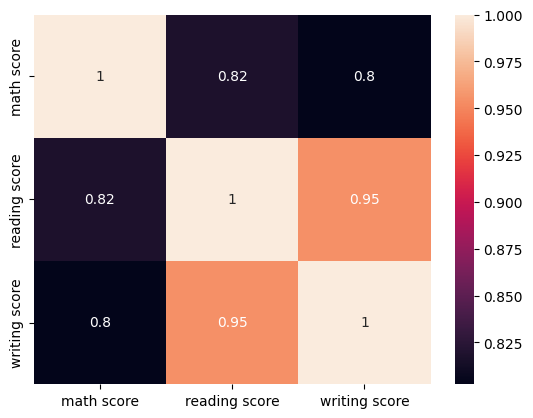

In [153]:
import seaborn as sns
sns.heatmap(corr, annot = True)

## Data Visualization- Bar Chart,Box plot Histogram

In [154]:
data['Parents_Education'].value_counts()

Parents_Education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

<Axes: xlabel='Parents_Education'>

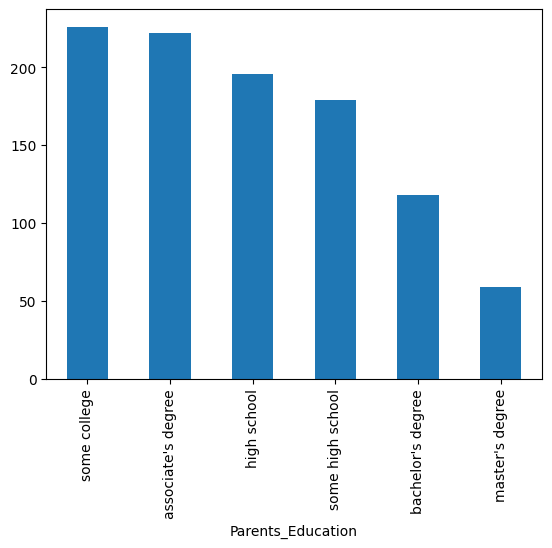

In [155]:

data['Parents_Education'].value_counts().plot(kind='bar')

In [156]:
data['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

<Axes: xlabel='gender'>

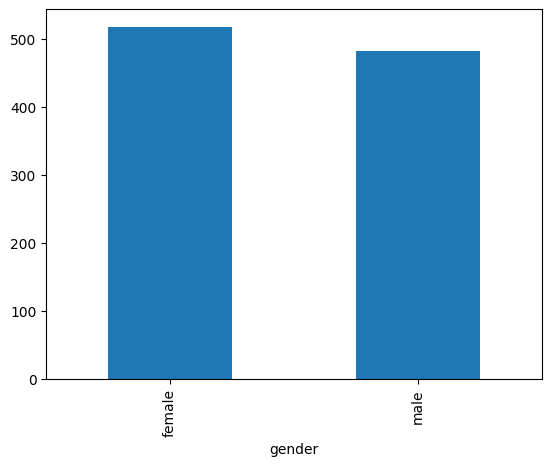

In [157]:
data['gender'].value_counts().plot(kind = 'bar')

In [158]:
data['Group'].value_counts()

Group
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

<Axes: xlabel='Group'>

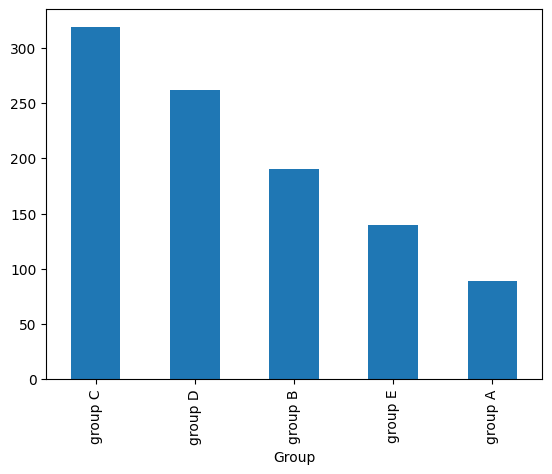

In [159]:
data['Group'].value_counts().plot(kind = 'bar')

In [160]:
data['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

<Axes: xlabel='lunch'>

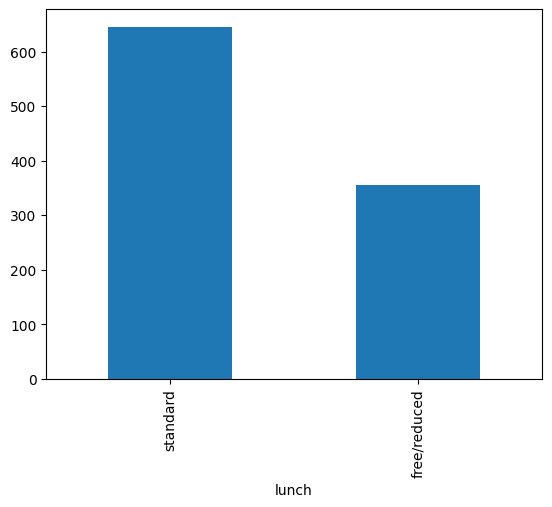

In [161]:
data['lunch'].value_counts().plot(kind = 'bar')

### Numerical Variable- plot Histogram/Box plot 

gender               0
Group                0
Parents_Education    0
lunch                0
test_course          0
math score           0
reading score        0
writing score        0
dtype: int64

<Axes: ylabel='Frequency'>

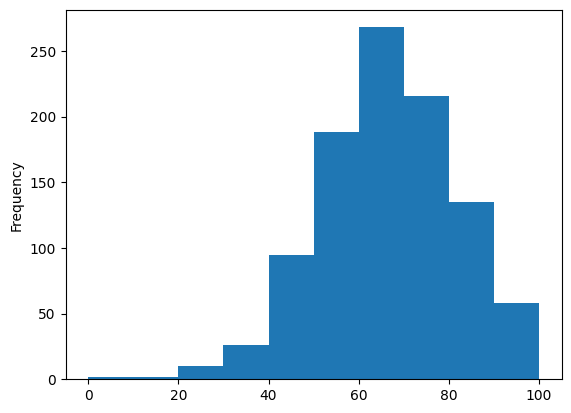

In [162]:
data['math score'].plot(kind = 'hist')

<Axes: >

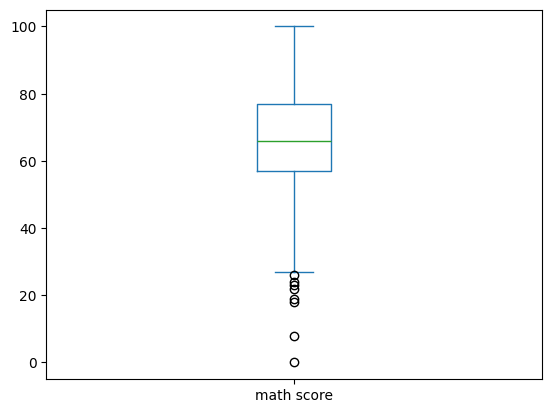

In [163]:
df['math score'].plot(kind='box')

<Axes: ylabel='Frequency'>

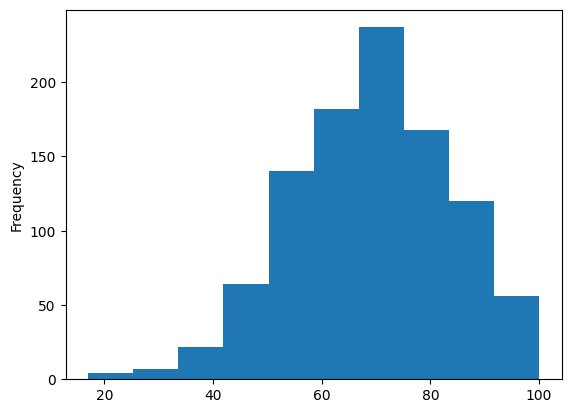

In [164]:
data['reading score'].plot(kind = 'hist')

<Axes: >

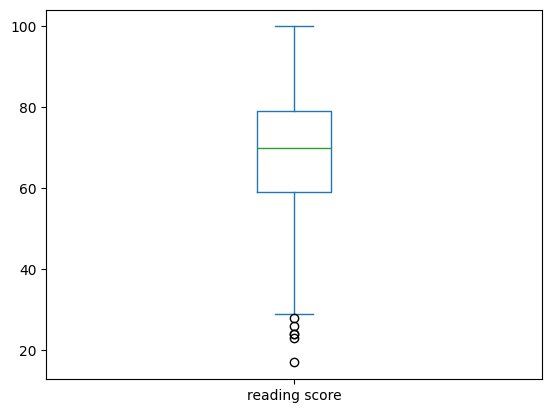

In [165]:
data['reading score'].plot(kind = 'box')

<Axes: ylabel='Frequency'>

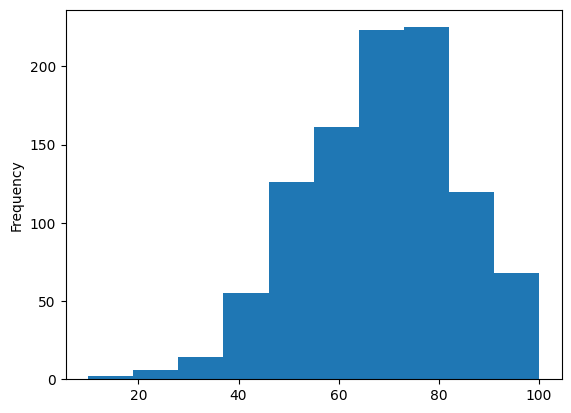

In [166]:
data['writing score'].plot(kind = 'hist')

<Axes: >

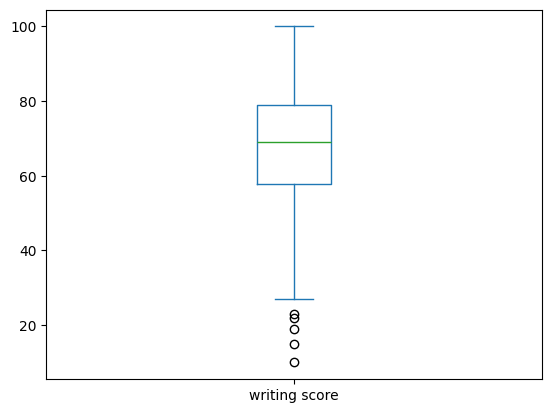

In [167]:
data['writing score'].plot(kind = 'box')

In [168]:
data.head()

,gender,Group,Parents_Education,lunch,test_course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Feature Engineering

### LabelEncoding

In [169]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [170]:
data['gender'] = le.fit_transform(data['gender'])


In [171]:
data

,gender,Group,Parents_Education,lunch,test_course,math score,reading score,writing score
0,0,group B,bachelor's degree,standard,none,72,72,74
1,0,group C,some college,standard,completed,69,90,88
2,0,group B,master's degree,standard,none,90,95,93
3,1,group A,associate's degree,free/reduced,none,47,57,44
4,1,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,standard,completed,88,99,95
996,1,group C,high school,free/reduced,none,62,55,55
997,0,group C,high school,free/reduced,completed,59,71,65
998,0,group D,some college,standard,completed,68,78,77


In [172]:
data['Group'] = le.fit_transform(data['Group'])

In [173]:
data['Parents_Education'] = le.fit_transform(data['Parents_Education'])

In [174]:
data['lunch'] = le.fit_transform(data['lunch'])

In [175]:
data['test_course'] = le.fit_transform(data['test_course'])

In [176]:
data.head()

,gender,Group,Parents_Education,lunch,test_course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


# Feature Scaling

In [177]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [178]:
data['reading score_scaled'] = Scaler.fit_transform(data[['reading score']])
data['writing score_scaled'] = Scaler.fit_transform(data[['writing score']])

### Data after Scaling

In [179]:
data.head()

,gender,Group,Parents_Education,lunch,test_course,math score,reading score,writing score,reading score_scaled,writing score_scaled
0,0,1,1,1,1,72,72,74,0.193999,0.391492
1,0,2,4,1,0,69,90,88,1.427476,1.313269
2,0,1,3,1,1,90,95,93,1.770109,1.642475
3,1,0,0,0,1,47,57,44,-0.833899,-1.583744
4,1,2,4,1,1,76,78,75,0.605158,0.457333


## Dependent and Independent Features:

In [180]:
x = data[['gender','Group','Parents_Education','lunch','test_course','reading score_scaled','writing score_scaled']]
y = data['math score']

In [181]:
x.head()

,gender,Group,Parents_Education,lunch,test_course,reading score_scaled,writing score_scaled
0,0,1,1,1,1,0.193999,0.391492
1,0,2,4,1,0,1.427476,1.313269
2,0,1,3,1,1,1.770109,1.642475
3,1,0,0,0,1,-0.833899,-1.583744
4,1,2,4,1,1,0.605158,0.457333


# Splitting the data into Training and Testng:

In [182]:
from sklearn.model_selection import train_test_split


In [183]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

#### thats means 80 % train & 20% test of each columns:

In [184]:
x_test.shape , y_train.shape

((200, 7), (800,))

# Model Development:

In [185]:
from sklearn.linear_model import LinearRegression
Linear_Regression = LinearRegression()

### Model Training:

In [186]:
Linear_Regression.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Model prediction:

In [187]:
y_pred_lr = Linear_Regression.predict(x_test)
y_pred_lr

array([77.11855699, 57.07358   , 79.35766788, 77.15093246, 84.91283746,
       79.85882914, 64.42312794, 52.47379147, 74.61139924, 50.01079481,
       50.44499321, 34.35758768, 66.28655135, 53.66602689, 87.80646619,
       72.17082069, 53.95429413, 49.37064522, 50.9262122 , 54.29513402,
       76.62310917, 40.71538364, 58.29731054, 37.36725562, 79.81455128,
       82.97797069, 78.19297014, 47.74573476, 30.07261305, 50.78240619,
       64.87175577, 71.33702911, 60.67758836, 80.02527415, 81.33394066,
       44.34870972, 77.69510363, 71.30097175, 68.74385772,  5.55960328,
       79.39326779, 67.03153924, 70.24327126, 57.98869524, 81.84992687,
       63.32744767, 72.92197518, 25.23196669, 88.34098662, 68.57937392,
       74.78793329, 68.47641886, 81.93280101, 44.45521451, 66.816886  ,
       68.45481502, 87.85867411, 59.7048815 , 82.00776395, 79.76782416,
       46.22592721, 72.64647108, 71.08502792, 53.81716683, 89.61629394,
       65.04085968, 60.6108109 , 55.94870276, 57.79623104, 83.99

In [188]:
df1=pd.DataFrame({'y_Actual':y_test ,'y_predicted':y_pred_lr })
df1

,y_Actual,y_predicted
521,91,77.118557
737,53,57.073580
740,80,79.357668
660,74,77.150932
411,84,84.912837
...,...,...
408,52,44.903648
332,62,59.926534
208,74,66.529192
613,65,67.953852


In [189]:
df1['Error'] = df1['y_Actual'] - df1['y_predicted']
df1

,y_Actual,y_predicted,Error
521,91,77.118557,13.881443
737,53,57.073580,-4.073580
740,80,79.357668,0.642332
660,74,77.150932,-3.150932
411,84,84.912837,-0.912837
...,...,...,...
408,52,44.903648,7.096352
332,62,59.926534,2.073466
208,74,66.529192,7.470808
613,65,67.953852,-2.953852


In [190]:
df1['abs_error'] = abs(df1['Error'])
df1

,y_Actual,y_predicted,Error,abs_error
521,91,77.118557,13.881443,13.881443
737,53,57.073580,-4.073580,4.073580
740,80,79.357668,0.642332,0.642332
660,74,77.150932,-3.150932,3.150932
411,84,84.912837,-0.912837,0.912837
...,...,...,...,...
408,52,44.903648,7.096352,7.096352
332,62,59.926534,2.073466,2.073466
208,74,66.529192,7.470808,7.470808
613,65,67.953852,-2.953852,2.953852


In [191]:
mean_absolute_Error = df1['abs_error'].mean()
mean_absolute_Error

np.float64(4.130145078004055)

# Model Evaluation:

In [192]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

### Model Accuracy:

In [193]:
round(r2_score(y_test, y_pred_lr),3)
print(f'Accuracy of the model={round(r2_score(y_test,y_pred_lr),3)*100}%')

Accuracy of the model=88.4%


### Mean Absolute Error:

In [194]:
round(mean_absolute_error(y_test,y_pred_lr),2)
print(f'Mean absolute Error ={round(mean_absolute_error(y_test,y_pred_lr),2)}')

Mean absolute Error =4.13


### mean Squared Error:

In [195]:
mse = round(mean_squared_error(y_test,y_pred_lr),2)
print(f'mean squared errror:{mse}')

mean squared errror:28.28


### Root Mean Squared Error:

In [196]:
print('Root Mean Squared Error(RMSE)=',mse**(0.5))

Root Mean Squared Error(RMSE)= 5.317894320123332


### Coefficient:

In [197]:
Linear_Regression.coef_

array([12.94532962,  0.84505096,  0.15584086,  3.74537683,  2.73965194,
        4.70596815,  9.51129729])

### Intercept:

In [198]:
Linear_Regression.intercept_

np.float64(53.52975655472434)

### Costomise Prediction:

In [199]:
data.head()

,gender,Group,Parents_Education,lunch,test_course,math score,reading score,writing score,reading score_scaled,writing score_scaled
0,0,1,1,1,1,72,72,74,0.193999,0.391492
1,0,2,4,1,0,69,90,88,1.427476,1.313269
2,0,1,3,1,1,90,95,93,1.770109,1.642475
3,1,0,0,0,1,47,57,44,-0.833899,-1.583744
4,1,2,4,1,1,76,78,75,0.605158,0.457333


In [200]:
data.columns

Index(['gender', 'Group', 'Parents_Education', 'lunch', 'test_course',
       'math score', 'reading score', 'writing score', 'reading score_scaled',
       'writing score_scaled'],
      dtype='object')

'gender = male , 1
Group  = group B, 1
Parents_Education = master degree, 3
lunch  = standard, 1
test_course = completed, 0
reading score  , 95
writing score  , 70
math score  ???

In [201]:
''''gender = male , 1
Group  = group B, 1
Parents_Education = master degree, 3
lunch  = standard, 1
test_course = completed, 0
reading score  , 95
writing score  , 70
math score  ???'''

"'gender = male , 1\nGroup  = group B, 1\nParents_Education = master degree, 3\nlunch  = standard, 1\ntest_course = completed, 0\nreading score  , 95\nwriting score  , 70\nmath score  ???"

In [202]:
gender =  1
Group  = 1
Parents_Education = 3
lunch  = 1
test_course = 0
reading_score1  =  Scaler.transform([[85]])
reading_score = 1.115
writing_score1 =  Scaler.transform([[80]])
writing_score = 0.786
# math_score = ???

c:\Users\nites\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\nites\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [203]:
reading_score1 = Scaler.transform([[85]])[0][0]
reading_score1

c:\Users\nites\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(1.1157450676810157)

In [204]:
writing_score1 =  Scaler.transform([[80]])[0][0]
writing_score1

c:\Users\nites\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(0.7865390403940407)

In [205]:
#Linear_Regression.predict([[gender,Group,Parents_Education,lunch,test_course,reading_score,writing_score]])
math_score = Linear_Regression.predict([[1,1,1,0,1,1.115,0.786]])
print(f'Predicted math score:',math_score[0])

Predicted math score: 82.93866409231686


c:\Users\nites\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
